#**Evaluación 1**

Realizando un analisis de datos del polo sur, Antartica. 

In [109]:
#imporatndo librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [110]:
# Tomando el URL del archivo en formato RAW
# Encabezado 164 lineas antes de comenzar con los datos 

url="https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_spo_DailyData.txt"

my_cols = ["site",'Year',"Mounth", "Day","hour","minute", "second","time", "Contracion de CO2", "value_sdt", "n_value", "latitude", "longitude", "altitude", "elevation", "intake_height","qcflag"]
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=151, skipfooter=1, engine='python')

In [111]:
print(df_dist.head(5))
print(df_dist.tail(5))

  site  Year  Mounth  Day  ...  altitude  elevation  intake_height  qcflag
0  SPO  1975       1    1  ...    2820.0     2810.0           10.0     *..
1  SPO  1975       1    2  ...    2820.0     2810.0           10.0     *..
2  SPO  1975       1    3  ...    2820.0     2810.0           10.0     *..
3  SPO  1975       1    4  ...    2820.0     2810.0           10.0     *..
4  SPO  1975       1    5  ...    2820.0     2810.0           10.0     *..

[5 rows x 17 columns]
      site  Year  Mounth  Day  ...  altitude  elevation  intake_height  qcflag
16430  SPO  2019      12   26  ...   2821.28     2810.0          11.28     ...
16431  SPO  2019      12   27  ...   2821.28     2810.0          11.28     ...
16432  SPO  2019      12   28  ...   2821.28     2810.0          11.28     ...
16433  SPO  2019      12   29  ...   2821.28     2810.0          11.28     ...
16434  SPO  2019      12   30  ...   2821.28     2810.0          11.28     ...

[5 rows x 17 columns]


In [112]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site               16435 non-null  object 
 1   Year               16435 non-null  int64  
 2   Mounth             16435 non-null  int64  
 3   Day                16435 non-null  int64  
 4   hour               16435 non-null  int64  
 5   minute             16435 non-null  int64  
 6   second             16435 non-null  int64  
 7   time               16435 non-null  float64
 8   Contracion de CO2  16435 non-null  float64
 9   value_sdt          16435 non-null  float64
 10  n_value            16435 non-null  int64  
 11  latitude           16435 non-null  float64
 12  longitude          16435 non-null  float64
 13  altitude           16435 non-null  float64
 14  elevation          16435 non-null  float64
 15  intake_height      16435 non-null  float64
 16  qcflag             164

In [113]:
#Cambiamos los valores -999.99 por NaN
df_dist = df_dist.replace(-999.99,np.NaN)

In [114]:
df_dist = pd.DataFrame(df_dist)
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site               16435 non-null  object 
 1   Year               16435 non-null  int64  
 2   Mounth             16435 non-null  int64  
 3   Day                16435 non-null  int64  
 4   hour               16435 non-null  int64  
 5   minute             16435 non-null  int64  
 6   second             16435 non-null  int64  
 7   time               16435 non-null  float64
 8   Contracion de CO2  15275 non-null  float64
 9   value_sdt          16435 non-null  float64
 10  n_value            16435 non-null  int64  
 11  latitude           16435 non-null  float64
 12  longitude          16435 non-null  float64
 13  altitude           16435 non-null  float64
 14  elevation          16435 non-null  float64
 15  intake_height      16435 non-null  float64
 16  qcflag             164

In [115]:
df_dist['FECHA'] = pd.to_datetime( {'year':df_dist['Year'], 'month':df_dist['Mounth'],'day':df_dist['Day']} , format='%Y%m%d')
df_dist= df_dist.drop(['Year', 'Mounth', 'Day','hour','minute','second'], 1)

In [116]:
df_dist

,site,time,Contracion de CO2,value_sdt,n_value,latitude,longitude,altitude,elevation,intake_height,qcflag,FECHA
0,SPO,1975.000000,NaN,-99.99,0,-89.98,-24.8,2820.00,2810.0,10.00,*..,1975-01-01
1,SPO,1975.002740,NaN,-99.99,0,-89.98,-24.8,2820.00,2810.0,10.00,*..,1975-01-02
2,SPO,1975.005479,NaN,-99.99,0,-89.98,-24.8,2820.00,2810.0,10.00,*..,1975-01-03
3,SPO,1975.008219,NaN,-99.99,0,-89.98,-24.8,2820.00,2810.0,10.00,*..,1975-01-04
4,SPO,1975.010959,NaN,-99.99,0,-89.98,-24.8,2820.00,2810.0,10.00,*..,1975-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
16430,SPO,2019.983562,409.12,0.02,24,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-26
16431,SPO,2019.986301,409.06,0.04,21,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-27
16432,SPO,2019.989041,409.00,0.04,17,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-28
16433,SPO,2019.991781,408.70,0.18,24,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-29


In [117]:
# Selecciona los renglones de 1980 hasta 2019
df_select=df_dist.loc[df_dist["FECHA"].between('1980-01-01', '2019-12-31')]
df_select

,site,time,Contracion de CO2,value_sdt,n_value,latitude,longitude,altitude,elevation,intake_height,qcflag,FECHA
1826,SPO,1980.000000,336.30,0.08,17,-89.98,-24.8,2823.50,2810.0,13.50,...,1980-01-01
1827,SPO,1980.002732,336.28,0.08,24,-89.98,-24.8,2823.50,2810.0,13.50,...,1980-01-02
1828,SPO,1980.005464,336.21,0.11,24,-89.98,-24.8,2823.50,2810.0,13.50,...,1980-01-03
1829,SPO,1980.008197,336.19,0.08,22,-89.98,-24.8,2823.50,2810.0,13.50,...,1980-01-04
1830,SPO,1980.010929,336.20,0.09,16,-89.98,-24.8,2823.50,2810.0,13.50,...,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
16430,SPO,2019.983562,409.12,0.02,24,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-26
16431,SPO,2019.986301,409.06,0.04,21,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-27
16432,SPO,2019.989041,409.00,0.04,17,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-28
16433,SPO,2019.991781,408.70,0.18,24,-89.98,-24.8,2821.28,2810.0,11.28,...,2019-12-29


In [118]:
df_ts_test = df_select.copy()

# Reemplazamos el índice por la variable 'Fecha' 

df_ts_test = df_select.set_index('FECHA')

In [119]:
#Solo dejar la columna con el valor de CO2
df_ts_test= df_ts_test.drop(['site', 'time', 'value_sdt','n_value','latitude','longitude','altitude','elevation','intake_height','qcflag'], 1)
df_ts_test.ffill(axis = 0, inplace=True)

In [120]:
df_ts_test

,Contracion de CO2
FECHA,
1980-01-01,336.30
1980-01-02,336.28
1980-01-03,336.21
1980-01-04,336.19
1980-01-05,336.20
...,...
2019-12-26,409.12
2019-12-27,409.06
2019-12-28,409.00


**Parte 2**... Análisis de la Serie de Tiempo

In [121]:
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima_model import ARIMAResults

from statsmodels.tsa.stattools import acf, pacf
import pandas.util.testing as tm
import warnings

In [122]:
# Función para probar la estacionaria de una serie de tiempo: 'timeseries'
   
def test_stationarity(df_ts): 

     #Determinar la Estadística de promedios móviles

     rolmean = df_ts.rolling(window=365, center=True).mean()

     rolstd = df_ts.rolling(window=365, center=True).std()

 

     # Define el tamaño de la figura

     plt.rcParams["figure.figsize"] = (12,6)

     #Graficar la Estadística de promedios móviles

     plt.plot(df_ts, color='blue',label='Original')

     plt.plot(rolmean, color='red', label='Rolling Mean')

     plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')

     plt.legend(loc='best')

     plt.title('Promedio Móvil y Desviación Estándar')

     plt.grid()

     plt.show()

     #Realiza la Prueba Aumentada de Dickey-Fuller:

     print('Resultados de la Prueba de Dickey-Fuller:')

     dftest = adfuller(df_ts, autolag='AIC')

     dfoutput = pd.Series(dftest[0:4],

          index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

     for key,value in dftest[4].items():

        dfoutput['Critical Value (%s)'%key] = value

     print(dfoutput)

In [123]:
#ts_test=ts_test.replace(-999.99,np.NaN)
df_ts_test

,Contracion de CO2
FECHA,
1980-01-01,336.30
1980-01-02,336.28
1980-01-03,336.21
1980-01-04,336.19
1980-01-05,336.20
...,...
2019-12-26,409.12
2019-12-27,409.06
2019-12-28,409.00


In [124]:
start, end = '1980-01', '2019-12'
ts_dataco2 = df_ts_test.loc[start:end].copy()
ts_dataco2.head()

,Contracion de CO2
FECHA,
1980-01-01,336.30
1980-01-02,336.28
1980-01-03,336.21
1980-01-04,336.19
1980-01-05,336.20


In [127]:
ts_dataco2['Contracion de CO2'].head()

FECHA
1980-01-01    336.30
1980-01-02    336.28
1980-01-03    336.21
1980-01-04    336.19
1980-01-05    336.20
Name: Contracion de CO2, dtype: float64

In [128]:
ts_test = ts_dataco2['Contracion de CO2'].copy()

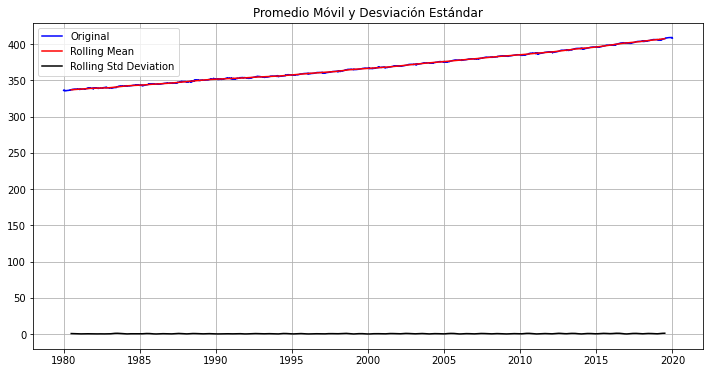

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                     0.967299
p-value                            0.993909
#Lags Used                        42.000000
Number of Observations Used    14566.000000
Critical Value (1%)               -3.430799
Critical Value (5%)               -2.861738
Critical Value (10%)              -2.566876
dtype: float64


In [129]:
test_stationarity(ts_test)

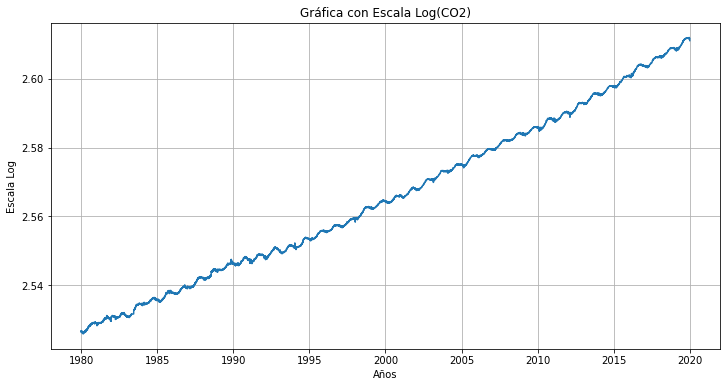

In [145]:
ts_test_log=np.log10(ts_test)
plt.plot(ts_test_log)
plt.xlabel("Años")
plt.ylabel('Escala Log')
plt.title('Gráfica con Escala Log(CO2)')
plt.grid()
plt.show();

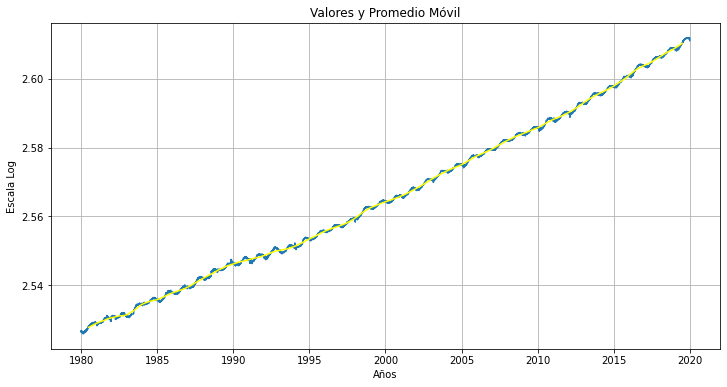

In [150]:

moving_avg = ts_test_log.rolling(365, center=True).mean()
plt.plot(ts_test_log)
plt.plot(moving_avg, color = 'yellow')
plt.xlabel('Años')
plt.ylabel('Escala Log')
plt.title('Valores y Promedio Móvil')
plt.grid()
plt.show();

In [132]:
ts_test_log_moving_ave_diff = ts_test_log - moving_avg 
ts_test_log_moving_ave_diff.head()

FECHA
1980-01-01   NaN
1980-01-02   NaN
1980-01-03   NaN
1980-01-04   NaN
1980-01-05   NaN
Name: Contracion de CO2, dtype: float64

In [133]:

ts_test_log_moving_ave_diff.dropna(inplace=True)
ts_test_log_moving_ave_diff.head()

FECHA
1980-07-01    0.000184
1980-07-02    0.000229
1980-07-03    0.000249
1980-07-04    0.000255
1980-07-05    0.000313
Name: Contracion de CO2, dtype: float64

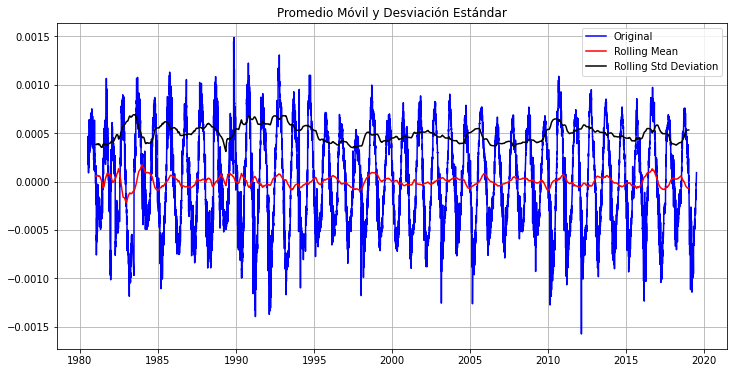

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.135404e+01
p-value                        9.834028e-21
#Lags Used                     4.200000e+01
Number of Observations Used    1.420200e+04
Critical Value (1%)           -3.430811e+00
Critical Value (5%)           -2.861744e+00
Critical Value (10%)          -2.566878e+00
dtype: float64


In [134]:
#Estacionaridad de la serie de tiempoen escala de Log
test_stationarity(ts_test_log_moving_ave_diff)

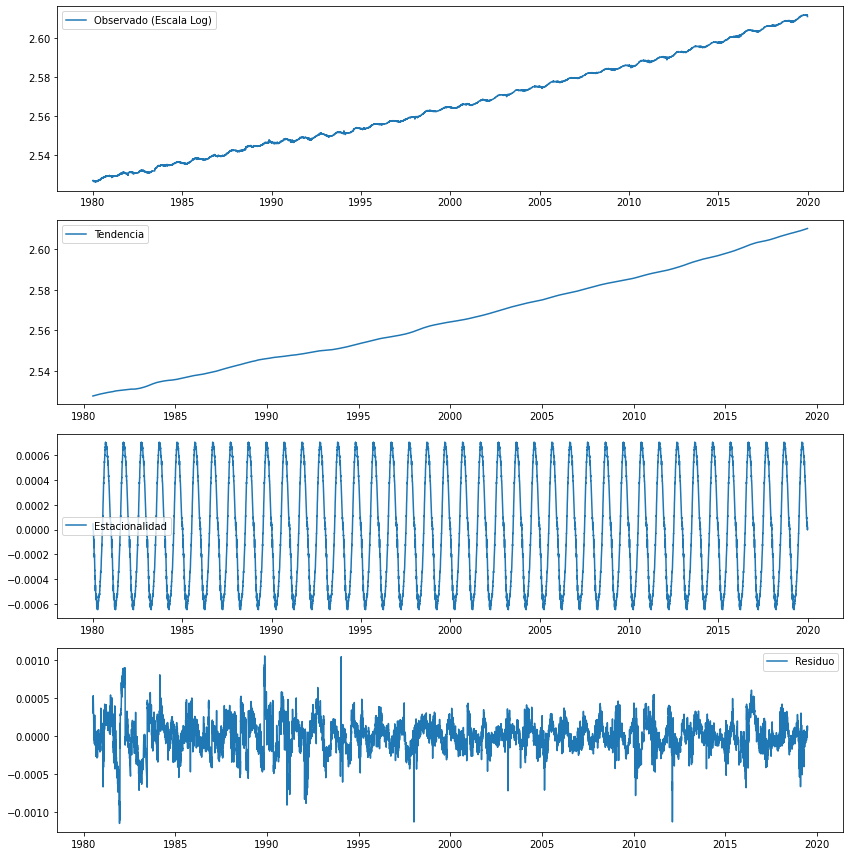

In [135]:
decomposition = sm.tsa.seasonal_decompose(ts_test_log.interpolate(), model='additive', freq=365)

 #La función regresa 3 componentes: tendencia, estacionalidad y un residuo

trend = decomposition.trend
seasonal = decomposition.seasonal
residue = decomposition.resid

plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(ts_test_log, label='Observado (Escala Log)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residuo')
plt.legend(loc='best')
# Colocar gráficas lo más cercanas posibles
plt.tight_layout();


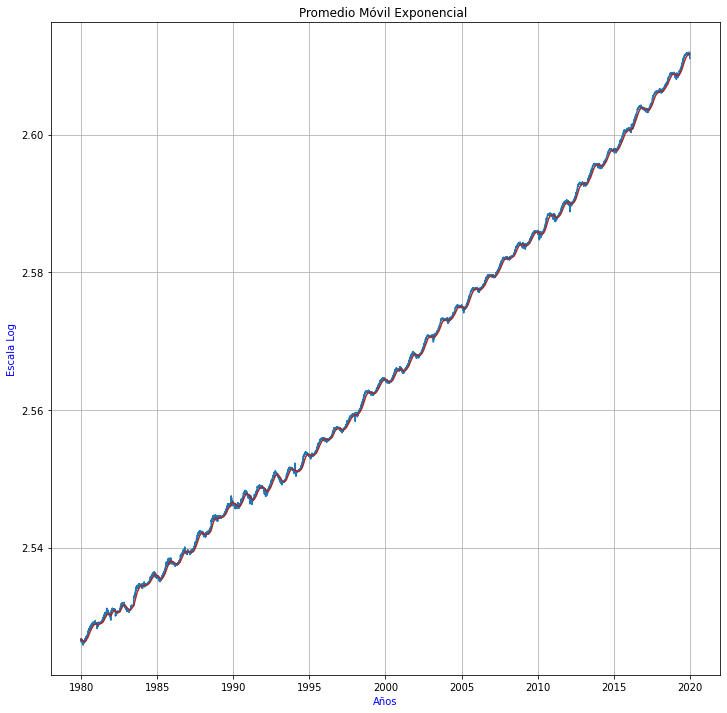

In [136]:
#Usando promedios exponenciales 

EWM_avg = ts_test_log.ewm(halflife=30).mean()
plt.plot(ts_test_log)
plt.plot(EWM_avg, color = 'brown')
plt.xlabel('Años',color='b')
plt.ylabel('Escala Log',color='b')
plt.title('Promedio Móvil Exponencial ')
plt.grid()
plt.show();

In [137]:
EWM_avg.head()

FECHA
1980-01-01    2.526727
1980-01-02    2.526714
1980-01-03    2.526679
1980-01-04    2.526654
1980-01-05    2.526642
Name: Contracion de CO2, dtype: float64

In [138]:
#Estacionarida de la diferencia 
ts_test_log_EWM_avg_diff = ts_test_log - EWM_avg

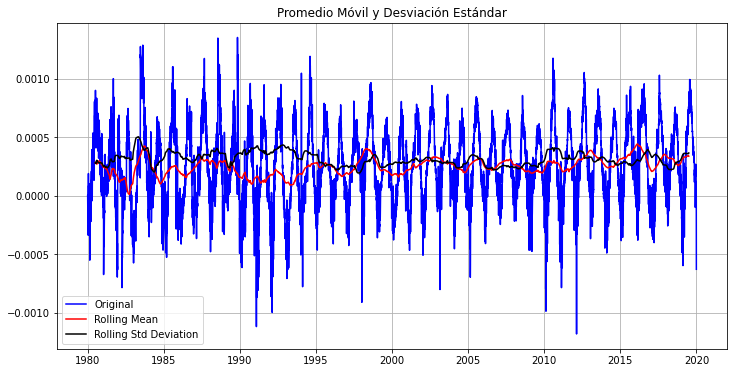

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -9.547516e+00
p-value                        2.625012e-16
#Lags Used                     4.200000e+01
Number of Observations Used    1.456600e+04
Critical Value (1%)           -3.430799e+00
Critical Value (5%)           -2.861738e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [139]:
#Estacionaridad de la nueva serie de tiempo escalada en Log y usando EWM
test_stationarity(ts_test_log_EWM_avg_diff)

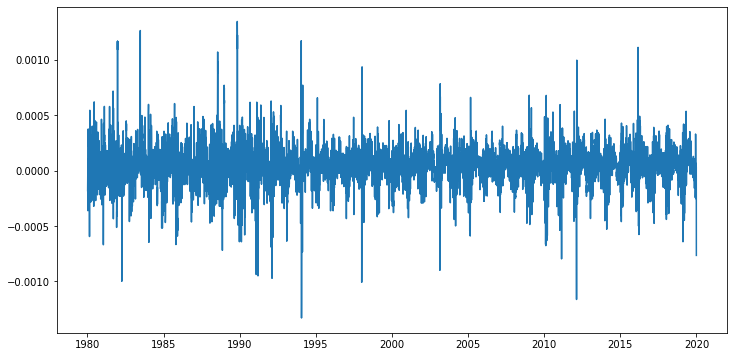

In [140]:
#Diferenciamos con la función df.shift()
ts_test_log_diff = ts_test_log - ts_test_log.shift(periods=7)
plt.plot(ts_test_log_diff);

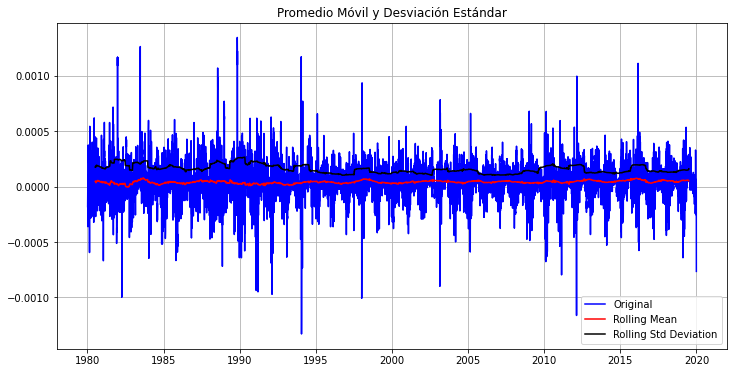

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.171116e+01
p-value                        1.487895e-21
#Lags Used                     4.200000e+01
Number of Observations Used    1.455900e+04
Critical Value (1%)           -3.430799e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [151]:
# Probamos la estacionaridad
ts_test_log_diff.dropna(inplace=True)
test_stationarity(ts_test_log_diff)

In [152]:
# Número de datos utilizados
len(ts_test_log_diff)

14602

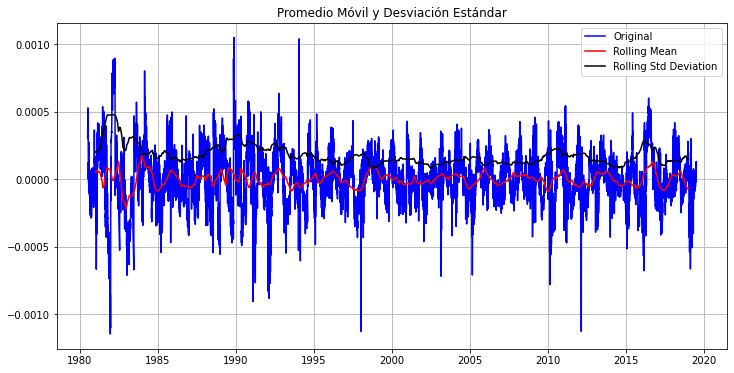

Resultados de la Prueba de Dickey-Fuller:
Test Statistic                -1.135671e+01
p-value                        9.694298e-21
#Lags Used                     2.800000e+01
Number of Observations Used    1.421600e+04
Critical Value (1%)           -3.430810e+00
Critical Value (5%)           -2.861743e+00
Critical Value (10%)          -2.566878e+00
dtype: float64


In [153]:
# Eliminando la Tendencia y Estacionalidad y comprobamos que la serie Residuo es estacionaria o no...

ts_test_log_decompose = residue 
ts_test_log_decompose.dropna(inplace=True)
test_stationarity(ts_test_log_decompose)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


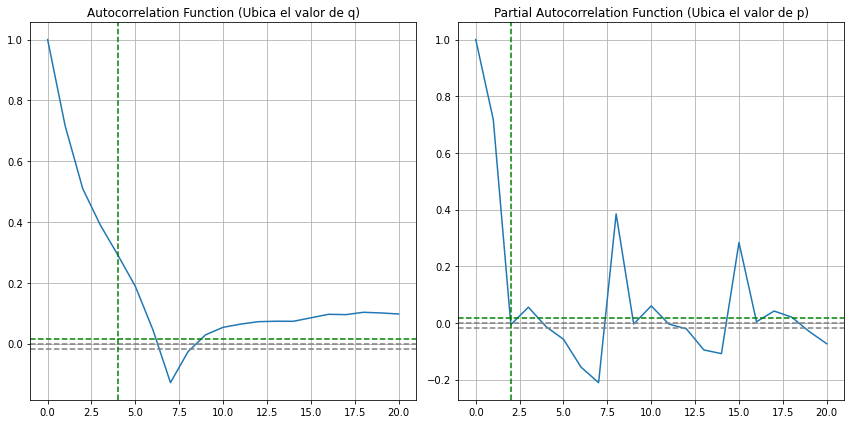

In [154]:

# Aplicamos ARIMA

lag_acf = acf(ts_test_log_diff, nlags=20)
lag_pacf = pacf(ts_test_log_diff, nlags=20, method = 'ols')

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_log_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.Contracion de CO2   No. Observations:                14608
Model:                  ARIMA(2, 1, 0)   Log Likelihood              116090.653
Method:                        css-mle   S.D. of innovations              0.000
Date:                 Thu, 25 Feb 2021   AIC                        -232173.306
Time:                         06:09:22   BIC                        -232142.948
Sample:                     01-02-1980   HQIC                       -232163.220
                          - 12-30-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.785e-06   5.34e-07     10.835      0.000    4.74e-06    6.83e-06
ar.L1.D.Contracion de CO2    -0.1516      0.008    -18.600      0.000      -0.

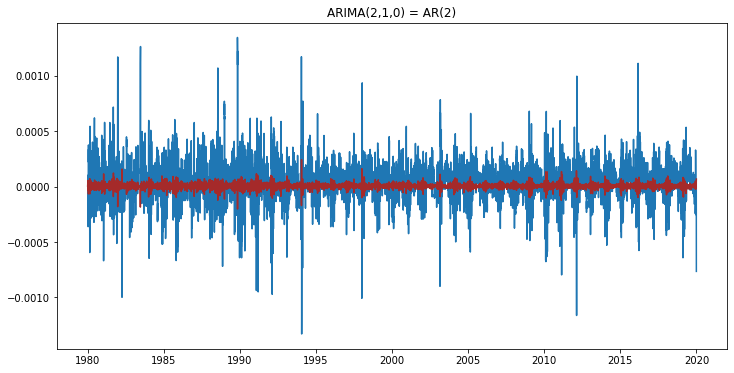

In [155]:
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_test_log, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARIMA Model Results                              
Dep. Variable:     D.Contracion de CO2   No. Observations:                14608
Model:                  ARIMA(0, 1, 4)   Log Likelihood              116198.497
Method:                        css-mle   S.D. of innovations              0.000
Date:                 Thu, 25 Feb 2021   AIC                        -232384.994
Time:                         06:09:57   BIC                        -232339.458
Sample:                     01-02-1980   HQIC                       -232369.866
                          - 12-30-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.791e-06   4.19e-07     13.831      0.000    4.97e-06    6.61e-06
ma.L1.D.Contracion de CO2    -0.1779      0.008    -21.474      0.000      -0.

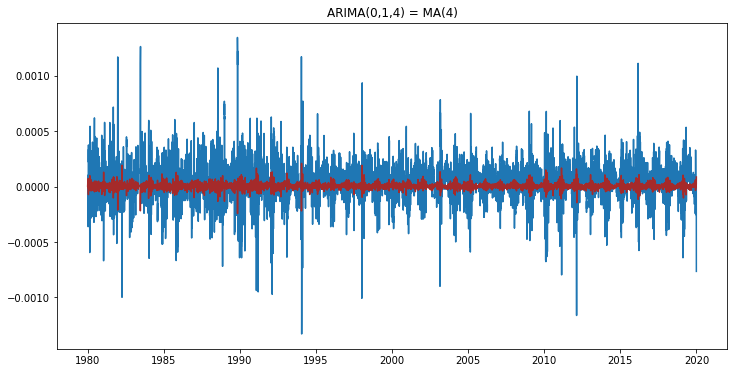

In [156]:
# Modelo MA(q): (p,d,q) = (0,1,4) 
model = ARIMA(ts_test_log, order=(0,1,4), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                              ARIMA Model Results                              
Dep. Variable:     D.Contracion de CO2   No. Observations:                14608
Model:                  ARIMA(2, 1, 4)   Log Likelihood              116199.193
Method:                        css-mle   S.D. of innovations              0.000
Date:                 Thu, 25 Feb 2021   AIC                        -232382.386
Time:                         06:20:03   BIC                        -232321.671
Sample:                     01-02-1980   HQIC                       -232362.216
                          - 12-30-2019                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.796e-06   4.21e-07     13.776      0.000    4.97e-06    6.62e-06
ar.L1.D.Contracion de CO2     0.4046        nan        nan        nan         

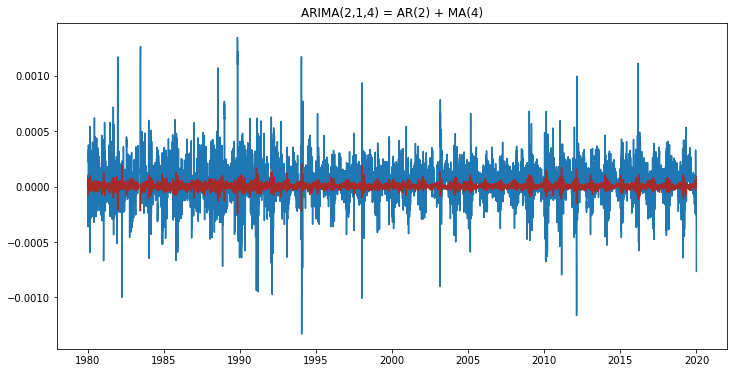

In [157]:
# Modelo ARIMA(p): (p,d,q) = (2,1,4) 
model = ARIMA(ts_test_log, order=(2,1,4), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())